**Project Background Classification task** 
#### Data : Credict card defaulter payment
#### Source: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
#### Description of the features:
##### ID: ID of each client
##### LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
##### SEX: Gender (1=male, 2=female)
##### EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
##### MARRIAGE: Marital status (1=married, 2=single, 3=others)
##### AGE: Age in years
##### PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
##### PAY_2: Repayment status in August, 2005 (scale same as above)
##### PAY_3: Repayment status in July, 2005 (scale same as above)
##### PAY_4: Repayment status in June, 2005 (scale same as above)
##### PAY_5: Repayment status in May, 2005 (scale same as above)
##### PAY_6: Repayment status in April, 2005 (scale same as above)
##### BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
##### BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
##### BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
##### BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
##### BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
##### BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
##### PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
##### PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
##### PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
##### PAY_AMT4: Amount of previous payment in June, 2005 ((NT dollar)
##### PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
##### PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
##### default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
# Import all neccesary Libraries and models
import pandas as pd
import numpy as np
# imports for vizualization
import matplotlib.pyplot as plt
import seaborn as sns
# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#Import Evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score
from sklearn.metrics import auc,roc_curve,classification_report
from sklearn.metrics import accuracy_score
#warnings
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

In [2]:
#Reading csv data file
data = pd.read_csv("UCI_Credit_Card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# checking the quick summary of the dataframe. 
# the null-values, data types are obatined to see any inconsistencies.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [4]:
# Checking for missing values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
#Drop the "ID" column since it is not useful.
data.drop("ID", inplace =True, axis = 1)
data.index

RangeIndex(start=0, stop=30000, step=1)

In [6]:
# statistical summary of the data
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


##### There are 30000 distict credict card customers.
##### The average value for the amount of the credit card limit is 167484 witha standard deviation of 129,747 and a maximum of 1000000.
##### The average of the customers is 35.4
##### The average default is 0.22 meaning that about 22% might go default next month.

In [7]:
#make a copy of the original dataframe for project.
data_use = data.copy()
#First Five rows of the dataframe.
data_use.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
# column names of the dataframe.
data_use.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [9]:
# Get all the names of the columns into lowercase
# Rename the columns- sex, pay_o and default.payment.next.month(target) to gender, pay_1 and default respectively.
def lower_rename(dataframe):
    dict_empty = {}
    for col in data_use.columns:
        lower = col.lower()
        dict_empty[col] = lower
        dataframe = dataframe.rename(columns = dict_empty)
        dataframe.rename(columns= {"sex":"gender","pay_0":"pay_1", "default.payment.next.month": "default"}, inplace =True)
    return dataframe

#Save it to a dataframe variable to worl with.
df_renamed = lower_rename(data_use)
df_renamed.head(10)

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,100000.0,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,140000.0,2,3,1,28,0,0,2,0,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,20000.0,1,3,2,35,-2,-2,-2,-2,-1,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [10]:
# From the top 10 rows it is evident that gender, education, default and marriage are categorical
# check the unique values in the categorical variables.
list_cat = ["gender", "marriage","education"]
for item in list_cat:
    for col in df_renamed.columns:
        if item == col:
            uniques = df_renamed[col].unique()
    print(item, "has unique values of {}".format(uniques))
len(df_renamed.columns.tolist())

gender has unique values of [2 1]
marriage has unique values of [1 2 3 0]
education has unique values of [2 1 3 5 4 6 0]


24

**Findings:** 
##### 1.   limit_bal : all values lies between 0 and 0.6. Age is between 20 and 75.
##### 2.   variables pay_1 to 5 lies between -1 and 10.
##### 3.  variables pay_atm_1to 6 lie near around 0

In [11]:
# examine pay_1
df_renamed.pay_1.unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [12]:
df_renamed.pay_1.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: pay_1, dtype: int64

In [13]:
# Convert the pay_1 to 6 variables into categorical.
pays = ["pay_" + str(i) for i in range(1,7)]
for name in pays:
    df_renamed.loc[df_renamed[name]>0, name] = 1
    df_renamed.loc[df_renamed[name]<0, name] = 0

In [14]:
# Print the unique values are convertion.
for name in pays:
    print("variable",name,"has unique value", df_renamed[name].unique())

variable pay_1 has unique value [1 0]
variable pay_2 has unique value [1 0]
variable pay_3 has unique value [0 1]
variable pay_4 has unique value [0 1]
variable pay_5 has unique value [0 1]
variable pay_6 has unique value [0 1]


In [15]:
df_renamed.education.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

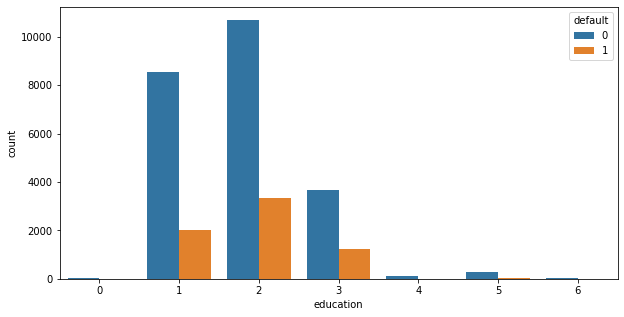

In [17]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="education", hue="default", data=df_renamed)

#####  **Most of the credit card holders are university or grad school degree holders**
##### **The credit card holders with Grad school degree are less likely to default next month when compared to high school or university graduates or toher categories.**

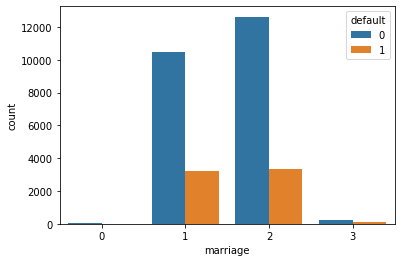

In [18]:
# 1 is maaried and 2 is single
ax= sns.countplot(x = "marriage",hue="default", data =df_renamed)


**Findings**
1.   Most of the customers are either married or single.
2.   Singles have less default payment when compared to married people.



In [19]:
# variable Education 
df_renamed.loc[df_renamed['education'].isin([0,4,5,6]), 'education'] = 4

In [20]:
df_renamed["education"].unique()

array([2, 1, 3, 4], dtype=int64)

In [21]:
df_renamed.education.value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

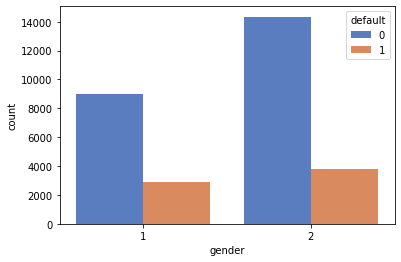

In [22]:
# Checking the number of defaulters and non defaulters based on gender (2 = female and 1 = male)
sns.countplot(x='gender', data=df_renamed,hue="default", palette="muted")

##### **Findings**
##### 1.   Females have less default payments when compared to males.
##### 2.  the fraction of non-defaulters in females is higher than defaulters portion.

In [23]:
df_renamed.head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000.0,2,2,1,24,1,1,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,1,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [24]:
df_renamed[['bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6']].describe()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [25]:
df_renamed.shape

(30000, 24)

In [26]:
## Feature scaling of numerical data
df_renamed.head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000.0,2,2,1,24,1,1,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,1,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


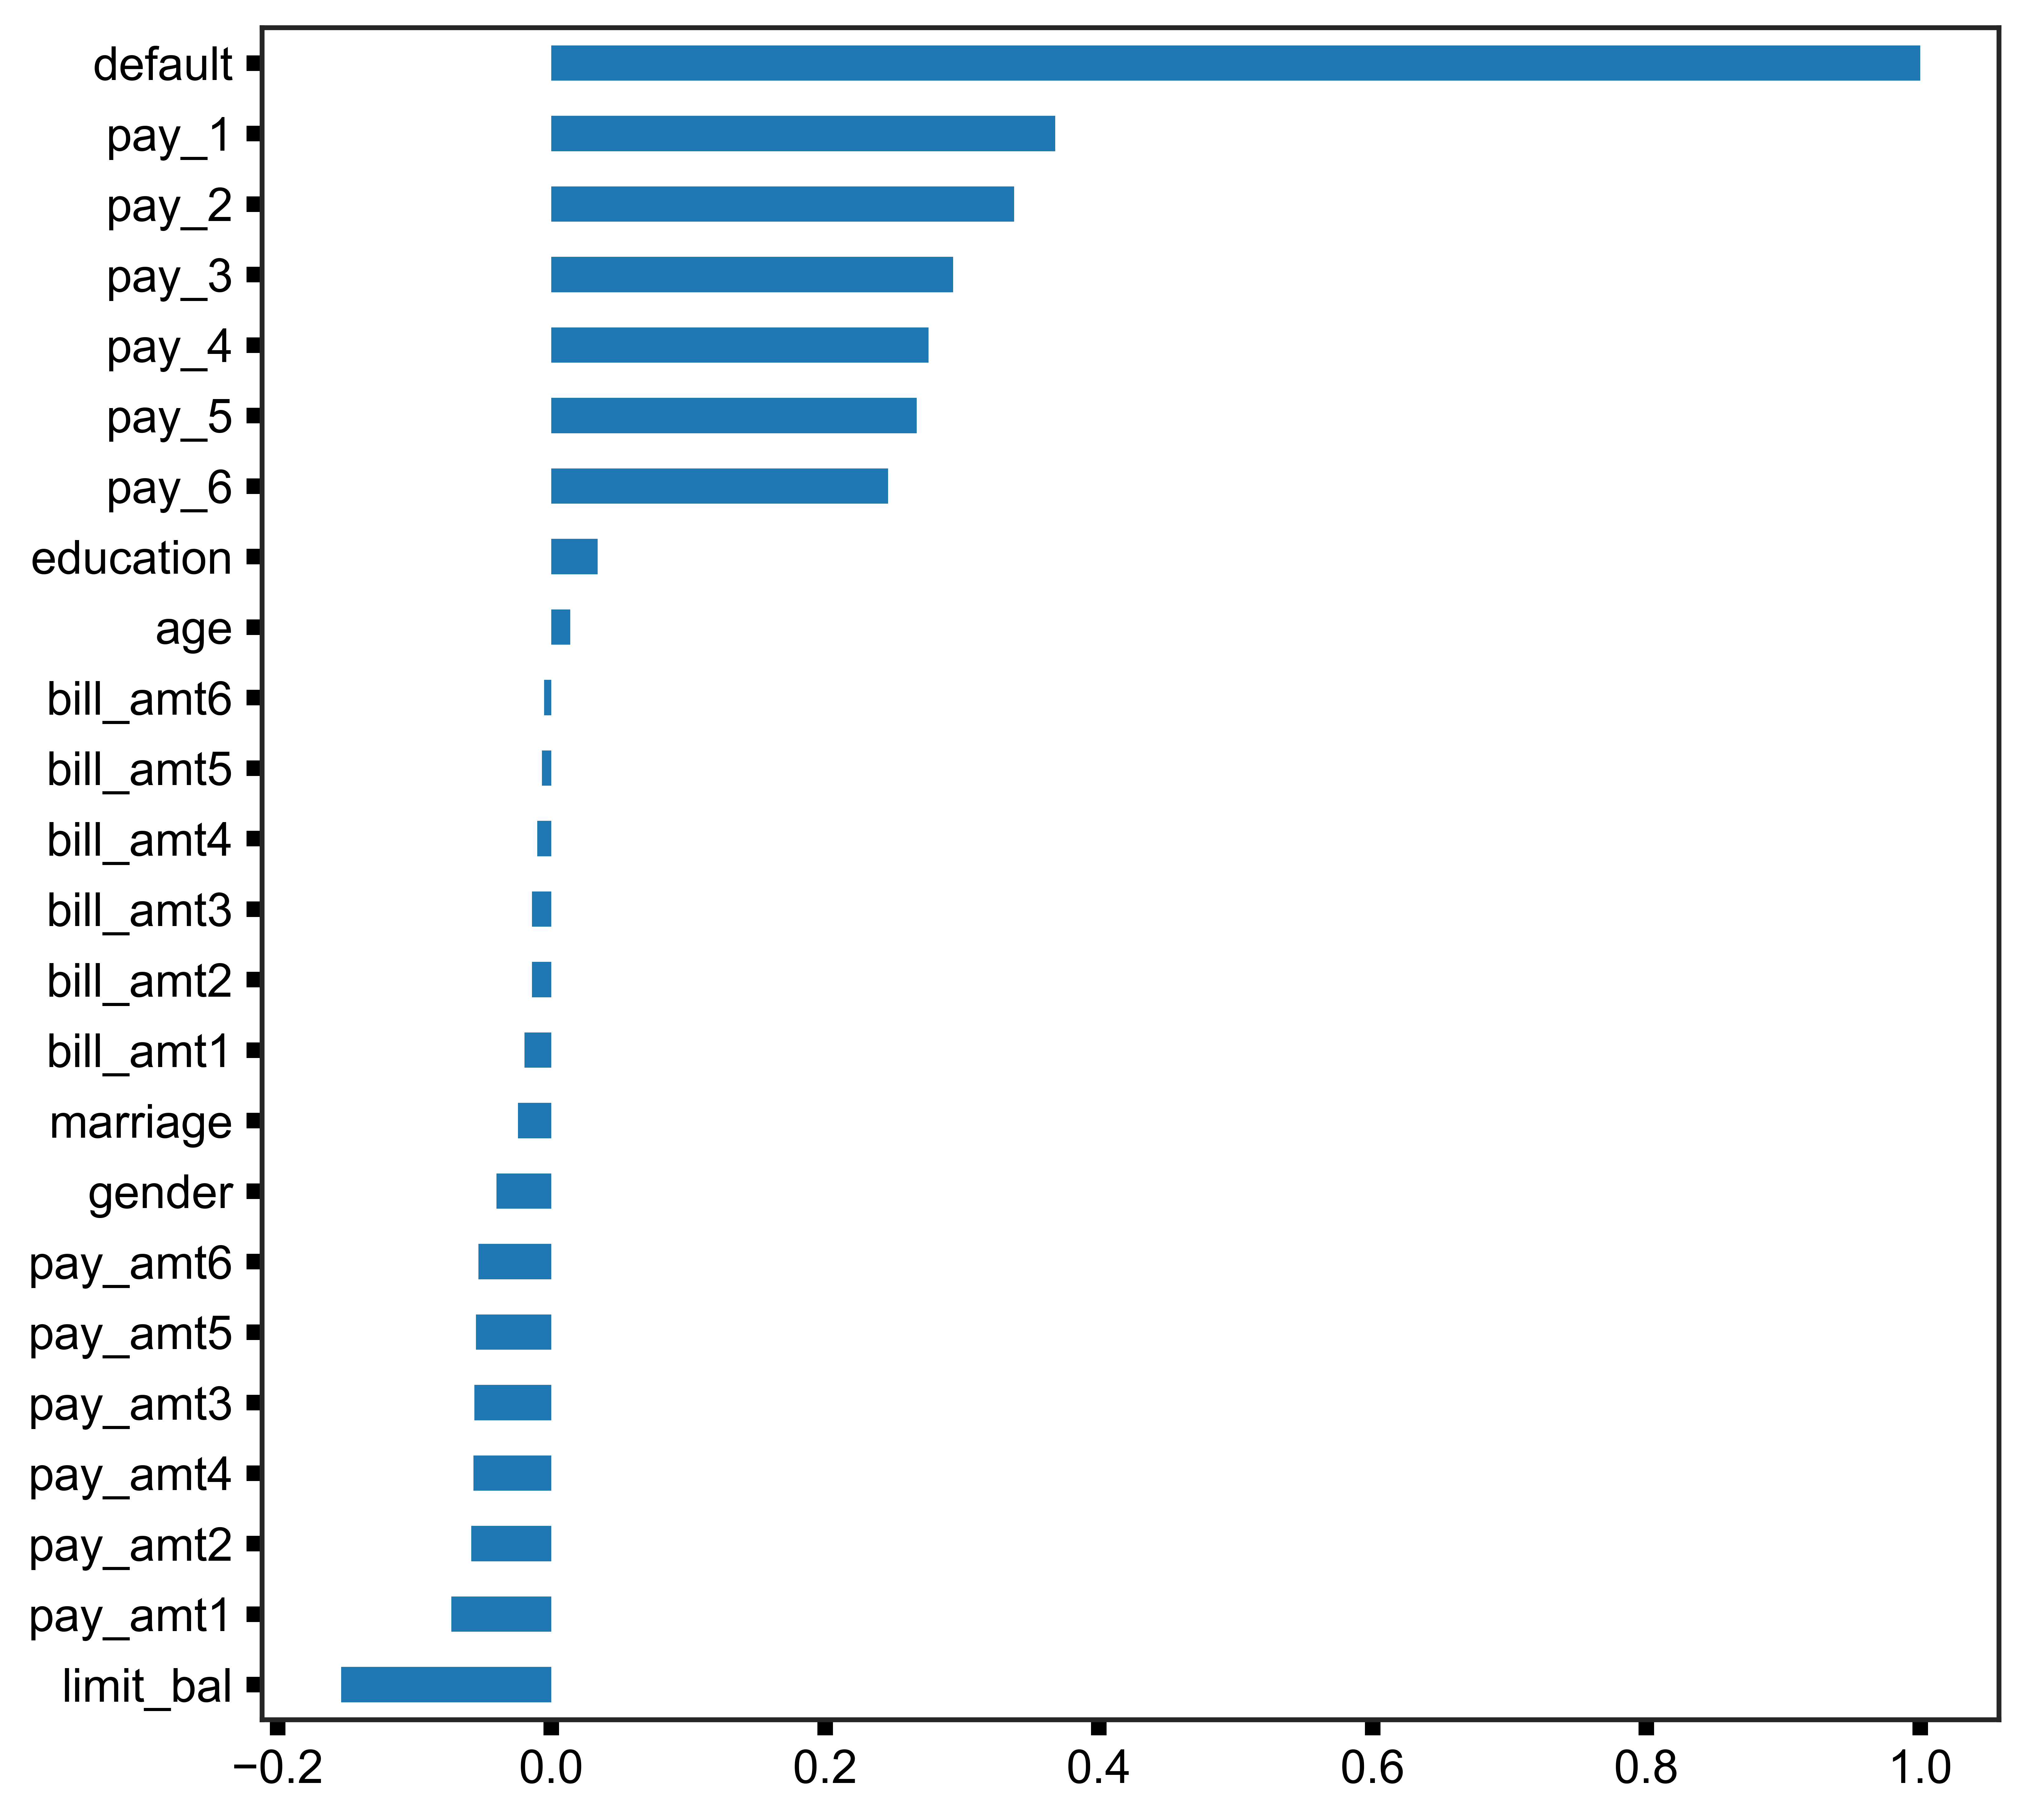

In [27]:
df_renamed.corr()
plt.style.use("seaborn-ticks")
plt.figure(figsize = (8,8),dpi=900)
plt.rcParams["axes.facecolor"] = "#FFFFFF"
plt.tick_params(axis = "x",colors = "black", direction = "out", length =4, width= 4)
plt.tick_params(axis = "y",colors = "black", direction = "out", length =4, width= 4)
plt.yticks( fontsize = 12)
plt.xticks( fontsize = 12, rotation=0)
df_renamed.corr()['default'].sort_values(ascending = True).plot(kind = 'barh')
#plt.grid(linestyle=':', linewidth='1', color='black')
plt.show()

#### 1.   limit_bal is most -vely correlated and it is important variable which cannot be neglected.
#### 2.   And pay_1 to 6 are highly correlated with the target variable.
#### 3. bill_atm6 and bill_atm5 are least correlated with target.

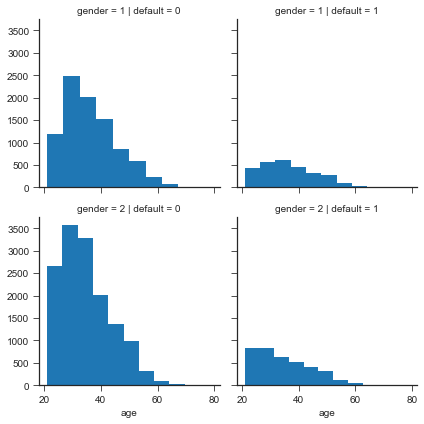

In [28]:
face= sns.FacetGrid(df_renamed, col = 'default', row = 'gender')
face.map(plt.hist, 'age')

#####  Face grid Plot Non defaults have a higher proportion for age group 20-40years

In [29]:
for col in df_renamed.columns:
    print("Variable  is", col, "and the number of unique values are", df_renamed[col].nunique())

Variable  is limit_bal and the number of unique values are 81
Variable  is gender and the number of unique values are 2
Variable  is education and the number of unique values are 4
Variable  is marriage and the number of unique values are 4
Variable  is age and the number of unique values are 56
Variable  is pay_1 and the number of unique values are 2
Variable  is pay_2 and the number of unique values are 2
Variable  is pay_3 and the number of unique values are 2
Variable  is pay_4 and the number of unique values are 2
Variable  is pay_5 and the number of unique values are 2
Variable  is pay_6 and the number of unique values are 2
Variable  is bill_amt1 and the number of unique values are 22723
Variable  is bill_amt2 and the number of unique values are 22346
Variable  is bill_amt3 and the number of unique values are 22026
Variable  is bill_amt4 and the number of unique values are 21548
Variable  is bill_amt5 and the number of unique values are 21010
Variable  is bill_amt6 and the numbe

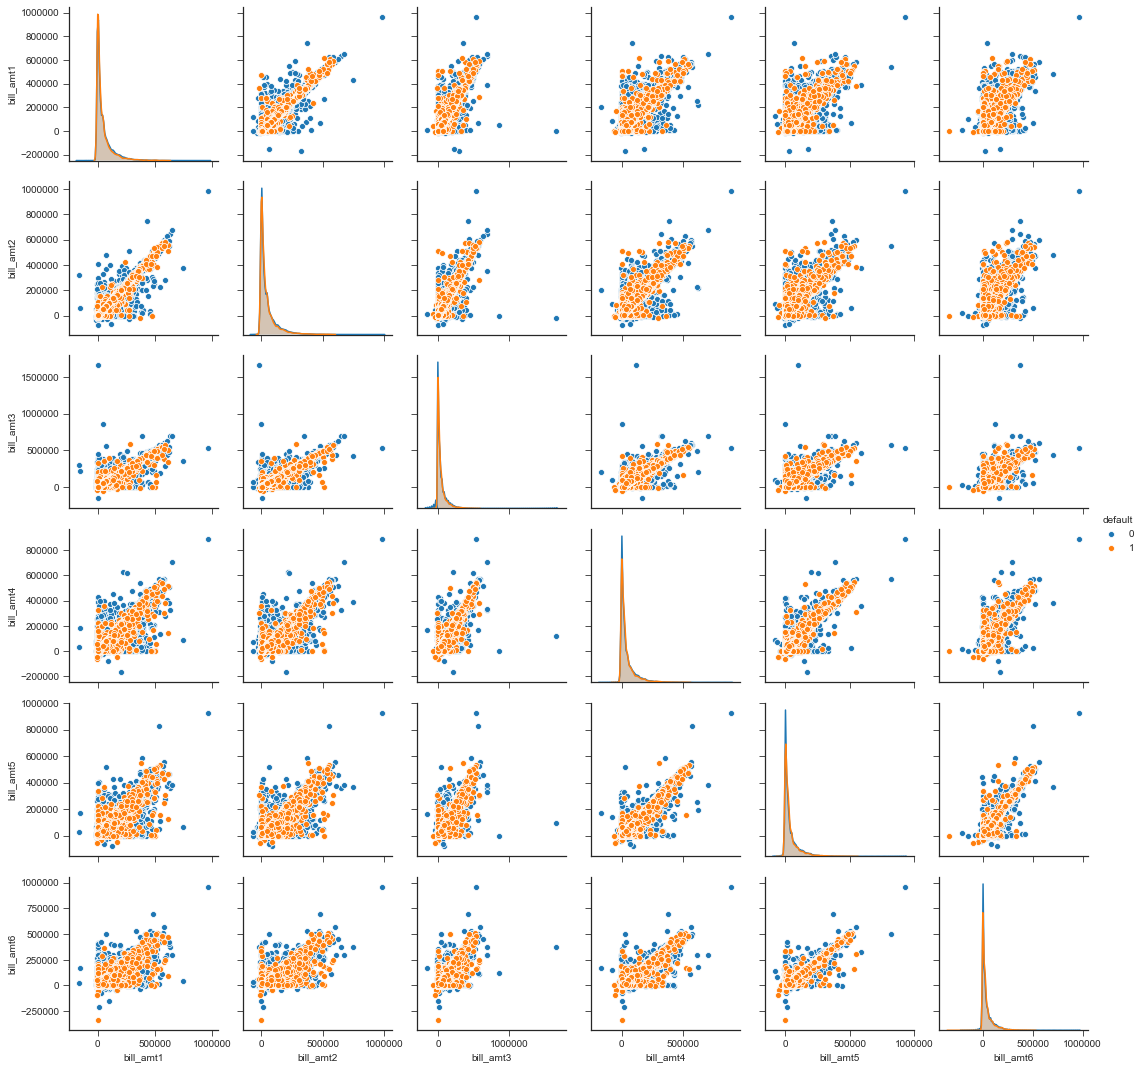

In [30]:
sns.pairplot(df_renamed, vars= df_renamed.columns[11:17], kind = "scatter", hue = "default")

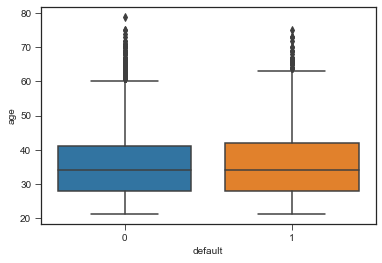

In [31]:
sns.boxplot(x='default',y='age',data=df_renamed)

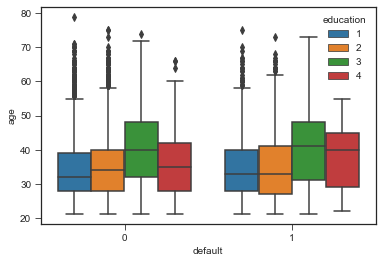

In [32]:
sns.boxplot(x='default',hue='education', y='age',data=df_renamed)

##### **Data preparation**

In [33]:
df_renamed.head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000.0,2,2,1,24,1,1,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,1,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [34]:
X = df_renamed.drop(["default"], axis =1)
y = df_renamed[["default"]]
dummy_var = pd.get_dummies(X, columns=["gender","education","marriage", "pay_1","pay_2","pay_3","pay_4","pay_5","pay_6"],drop_first=True)
dummy_var.head()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,...,education_4,marriage_1,marriage_2,marriage_3,pay_1_1,pay_2_1,pay_3_1,pay_4_1,pay_5_1,pay_6_1
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0,1,0,0,1,1,0,0,0,0
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0,0,1,0,0,1,0,0,0,1
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0,0,1,0,0,0,0,0,0,0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0,1,0,0,0,0,0,0,0,0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0,1,0,0,0,0,0,0,0,0


In [35]:
# Train test split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.20, random_state = 42)
for train_index, test_index in split.split(df_renamed, df_renamed["default"]):
  X_train, y_train = dummy_var.iloc[train_index,:], y.iloc[train_index,:]
  X_test, y_test = dummy_var.iloc[test_index,:], y.iloc[test_index,:]  

In [36]:
# Created a dictionary that has train and test data names as values to accesss in the for loop.
train_test = {"0":"X_train", "1":"y_train","2":"X_test","3":"y_test"}
for key in train_test:
  print("{}:{}".format(train_test[key],eval(train_test[key]).shape))
# check if classes were stratified
  if "y" in train_test[key]:
    print(train_test[key])
    print(np.sum(eval(train_test[key]))/eval(train_test[key]).shape[0])

X_train:(24000, 27)
y_train:(24000, 1)
y_train
default    0.221208
dtype: float64
X_test:(6000, 27)
y_test:(6000, 1)
y_test
default    0.221167
dtype: float64


##### **Obervations:**

##### The percentage of two classes of the target variable is equally distributed in both train and test data with 22 percent.

In [37]:
##### Data Normalization
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

##### **Functions for training and Evaluation**

In [38]:
# the following function trains the models on training data.
def train_model(classifier, X_train,y_train):
    # Fit the model on training data
    model.fit(X_train,y_train)
    print("Model is trained")

def predict_labels(classifier,X_test,y_test):
    y_preds = model.predict(X_test)
    Evaluation_F1 = f1_score(y_test,y_preds)
    return Evaluation_F1

def train_predict(classifier, X_train,y_train,X_test,y_test):
    # Name of the model and size of the training set.
    print ("Training a {} using a training set size of {}. . .".format(model.__class__.__name__, len(X_train)))
    train_model(classifier,X_train,y_train.ravel())
    print("F1 score for training set: {}".format(predict_labels(classifier, X_train,y_train.ravel())))
    print("F1 score for testing set:{}".format(predict_labels(classifier, X_test,y_test)))

In [39]:
# Testing the following base models that are not tuned
model_A = SVC()
model_B = KNeighborsClassifier(n_neighbors=3)
model_C = AdaBoostClassifier(n_estimators=10)
model_D = KNeighborsClassifier(n_neighbors=5)  
model_E = RandomForestClassifier(n_estimators = 100,n_jobs=1)
model_F = LogisticRegression()
for model in [model_A,model_B,model_C,model_D,model_E,model_F]:
    print ("\n{}: \n".format(model.__class__.__name__))
    for i, n in enumerate([20400,19200,16800,14500]):
        train_predict(model, np.array(X_train_norm[:n]), np.array(y_train[:n]).ravel(), np.array(X_test_norm), np.array(y_test))
        if i < 2: print ("----------------")
        print("_________________________________________________")
    print ("F1 score for predicting all \"yes\" on test set: {:.4f}".format(
    f1_score(y_test, [1]*len(y_test))))


SVC: 

Training a SVC using a training set size of 20400. . .
Model is trained
F1 score for training set: 0.470876585928489
F1 score for testing set:0.43940886699507387
----------------
_________________________________________________
Training a SVC using a training set size of 19200. . .
Model is trained
F1 score for training set: 0.47017001545595055
F1 score for testing set:0.4389763779527559
----------------
_________________________________________________
Training a SVC using a training set size of 16800. . .
Model is trained
F1 score for training set: 0.47696095673584243
F1 score for testing set:0.4381139489194499
_________________________________________________
Training a SVC using a training set size of 14500. . .
Model is trained
F1 score for training set: 0.4773279352226721
F1 score for testing set:0.4372230428360414
_________________________________________________
F1 score for predicting all "yes" on test set: 0.3622

KNeighborsClassifier: 

Training a KNeighborsClassifi

##### **Findings**
##### It is clear from the training of the base models that SVC performed better with all the training data splits.
##### The SVC base model is more generalized model when compared to other models with training and test data F1 scores  of 0.4 and 0.41 respectively.
##### So we select SVC model for further optimization and parameter tuning using gridsearch_cv

In [40]:
##### Support Vector Classifier
sv_classifier = SVC()

In [41]:
##### **Randomizd search** for hyper parameters of SVC
par_grid = {"C":[0.1,1,10,100,1000],
                "gamma": [1,0.1,0.01,0.001,0.0001],
                "kernel": ("rbf","linear","poly","sigmoid"),
            "degree":[2,3,4,5],
            "coef0" : [0.0,0.00001,0.0001,0.001,0.01,0.1],
            "shrinking":[True,False],
            "probability":[True,False],
            }
grid = RandomizedSearchCV(sv_classifier, par_grid, verbose=3)

In [42]:
grid.fit(X_train_norm,np.array(y_train).ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=1000, coef0=1e-05, degree=5, gamma=1, kernel=sigmoid, probability=True, shrinking=False;, score=0.706 total time= 1.3min
[CV 2/5] END C=1000, coef0=1e-05, degree=5, gamma=1, kernel=sigmoid, probability=True, shrinking=False;, score=0.709 total time= 1.3min
[CV 3/5] END C=1000, coef0=1e-05, degree=5, gamma=1, kernel=sigmoid, probability=True, shrinking=False;, score=0.704 total time= 1.1min
[CV 4/5] END C=1000, coef0=1e-05, degree=5, gamma=1, kernel=sigmoid, probability=True, shrinking=False;, score=0.717 total time= 1.4min
[CV 5/5] END C=1000, coef0=1e-05, degree=5, gamma=1, kernel=sigmoid, probability=True, shrinking=False;, score=0.703 total time= 1.3min
[CV 1/5] END C=100, coef0=0.001, degree=5, gamma=0.001, kernel=poly, probability=False, shrinking=False;, score=0.779 total time=  11.1s
[CV 2/5] END C=100, coef0=0.001, degree=5, gamma=0.001, kernel=poly, probability=False, shrinking=False;, score=0.779 tota

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'coef0': [0.0, 1e-05, 0.0001, 0.001,
                                                  0.01, 0.1],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ('rbf', 'linear', 'poly',
                                                   'sigmoid'),
                                        'probability': [True, False],
                                        'shrinking': [True, False]},
                   verbose=3)

In [43]:
grid.best_estimator_

SVC(C=0.1, gamma=0.1, kernel='poly')

In [44]:
#The optimized parameters for SVC according to randomizedsearchCV.
grid.best_params_

{'shrinking': True,
 'probability': False,
 'kernel': 'poly',
 'gamma': 0.1,
 'degree': 3,
 'coef0': 0.0,
 'C': 0.1}

In [45]:
grid.best_score_

0.8080833333333335

Confusion Matrix


AxesSubplot(0.125,0.125;0.62x0.755)


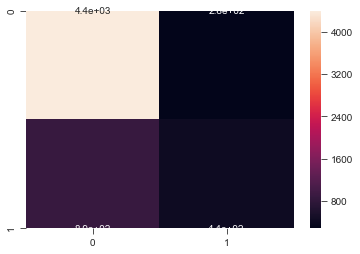

In [46]:
SVC_predictions = grid.predict(X_test_norm)
print("Confusion Matrix")
print("\n")
print(sns.heatmap((confusion_matrix(y_test,SVC_predictions)),annot=True))
# 0 is NO, NOT NEXT MONTH DFAULTER
# 1 is YES, DEFAULTER

### **Findings**:

##### The optimized support vector classifier(SVC) has TRUE POSITIVES of 320 and TRUE NEGATIVES of 4500.
##### SVC model IDENTIFIED 320 as customers who are  willing to default next month bill who are actually willing to default.
##### SVC correctly identified 4500 customers as GENUINE who are actually genuine
##### The optimized SVC has FALSE NEGATIVES of 160 and FLASE POSITIVES of 1000.
##### SVC model wrongly predicted that 160 who are  willing to default the next month payment as genuine and wont default next month.
##### SVC model wrongly predicted 1000 genuine customers as potential next month defaulters.

In [47]:
print("Classification report")
print("\n")
print(classification_report(y_test,SVC_predictions))

Classification report


              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4673
           1       0.61      0.33      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.64      0.66      6000
weighted avg       0.78      0.81      0.78      6000



## **Concluions:**
##### From Exploratory data analysis, we see that customers with the features as follows 
##### Gender: Female, 
##### Education:higher education
##### Status: single
##### Age : Between 30-40 are more likely to pay the credit card bills on time.
##### Out of all Untuned models SVC performed better on all 3 train test splits (85%,80%, 70%, and 60%) with train and test F1 scores of 0.47 and 0.43.
##### After hyperparameter optimization SVC accuracy of 80%